In [1]:
import numpy as np
import scipy.spatial as spatial
from skimage.morphology import thin
from skimage import io, img_as_ubyte
import matplotlib.pyplot as plt

plt.style.use('default')

In [2]:
input_map = r"..\Data\gmap_default.jpg"

In [3]:
# Get the first channel
map_array = io.imread(input_map)
map_array_0 = map_array[:,:,0]

In [4]:
# Road color: 255
map_bin = map_array_0 == 255

# The thinned image (to test: skeletonize, medial_axis)
map_thin = img_as_ubyte(thin(map_bin))

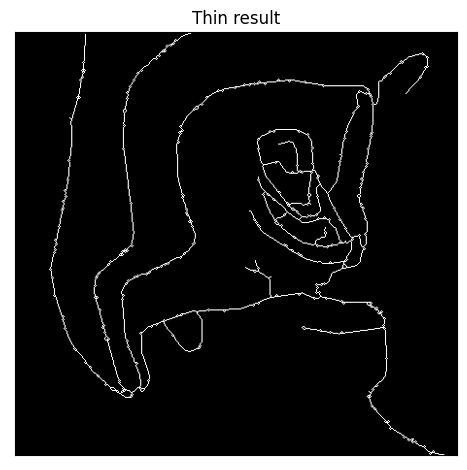

In [5]:
# Plot the thinned image
fig, ax = plt.subplots(1,1)
ax.set_title('Thin result')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.imshow(map_thin, cmap="Greys_r")
plt.tight_layout()
plt.show()

In [6]:
# Get the points
where_255 = np.where(map_thin == 255)

points = []
for i, indexy in enumerate(where_255[0]):
    indexx = where_255[1][i]
    points.append((indexx, indexy))
points = np.array(points)

In [7]:
# Search all pairs of points within a max distance
min_distance = 1
max_distance = np.sqrt(min_distance**2 + min_distance**2)
kd_tree = spatial.cKDTree(points)
indexes = kd_tree.query_ball_tree(kd_tree, max_distance)

# Prepare data for plotting: create an array [(x1-x2), (y1-y2)]
lines = [[(points[idx1, 0], points[idx2, 0]), (points[idx1, 1], points[idx2, 1])] 
       for idx1, group in enumerate(indexes) 
       for idx2 in group if idx2 > idx1]

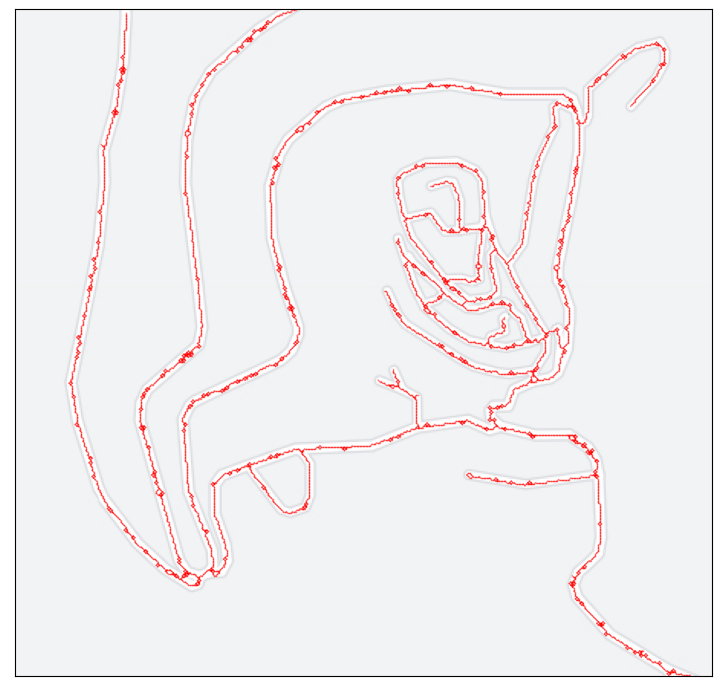

In [8]:
# Creates a figure and one subplot
fig, ax = plt.subplots(figsize=(9, 9))

# Show the original image
ax.imshow(map_array)

# Plot the lines
for line in lines:
    ax.plot(line[0], line[1], color='r', linewidth=1, alpha=0.5)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Show the plot
plt.show()